In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.columns.values

array(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend',
       ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity',

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", ""), inplace=True)

In [5]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [18]:
df = df[df['n_tokens_content'] != 0]

In [25]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

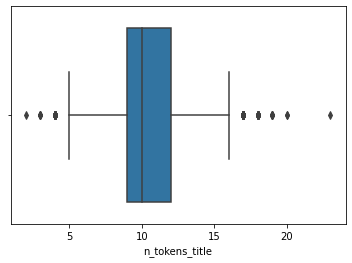

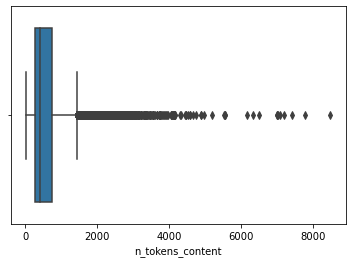

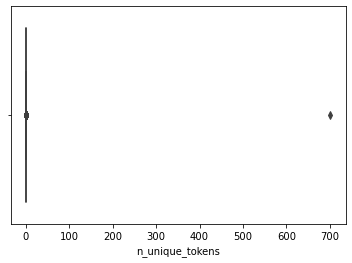

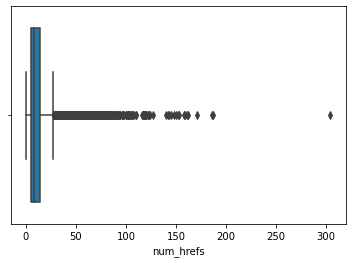

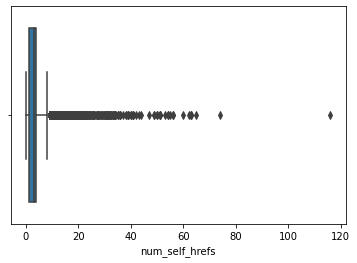

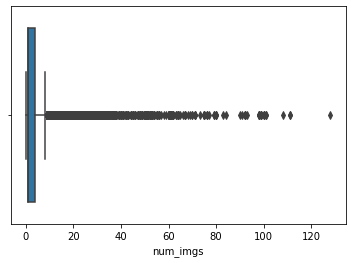

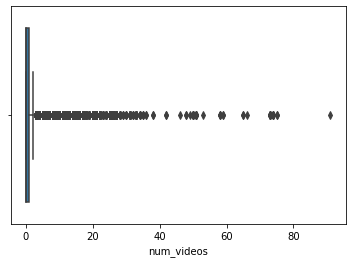

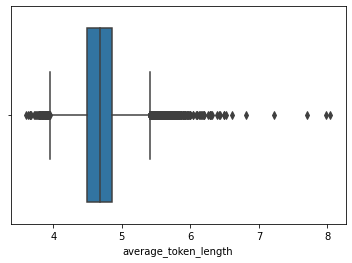

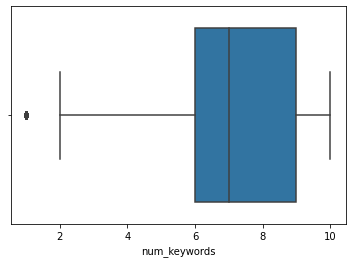

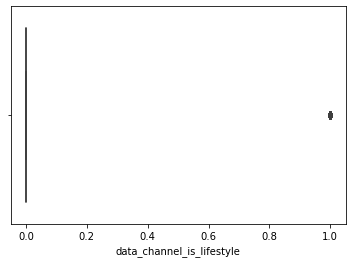

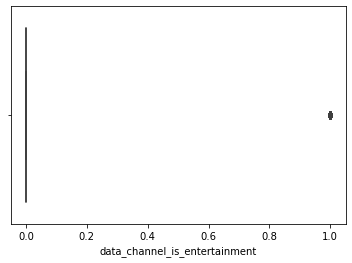

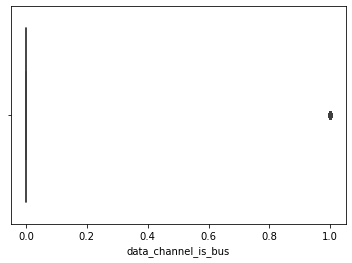

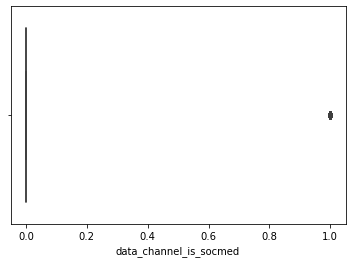

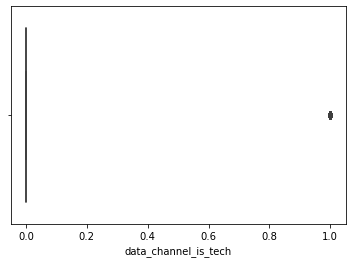

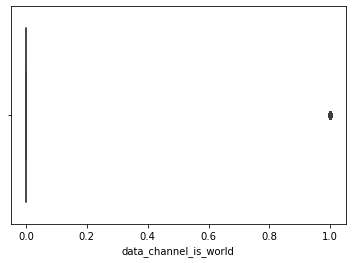

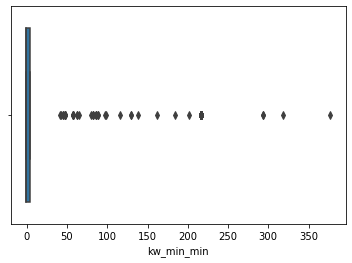

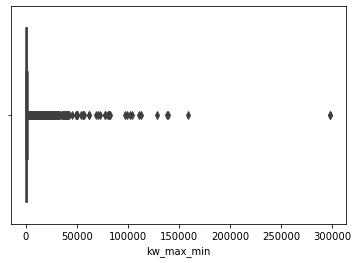

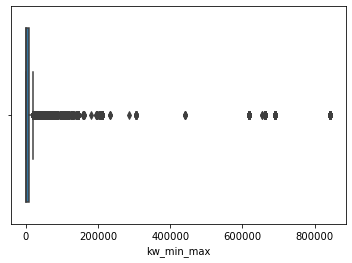

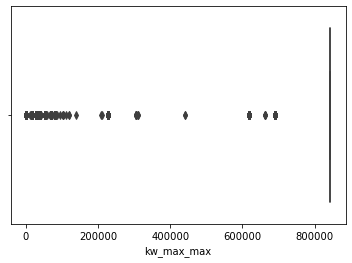

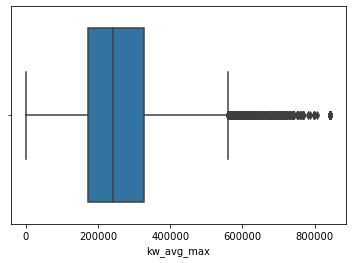

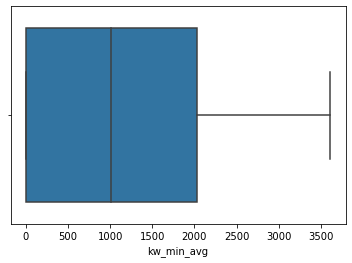

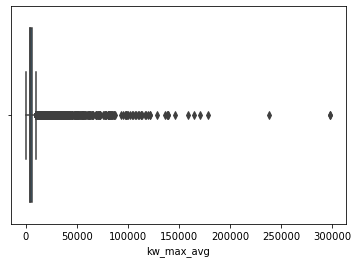

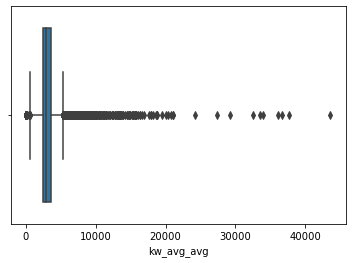

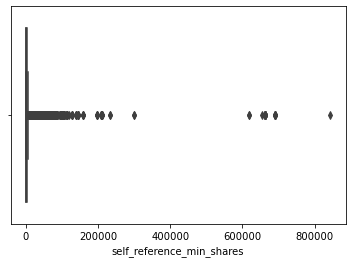

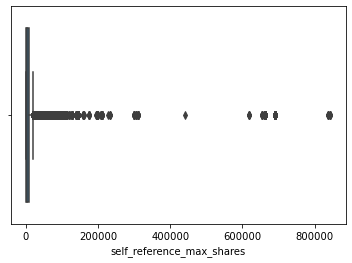

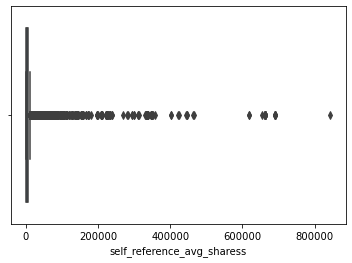

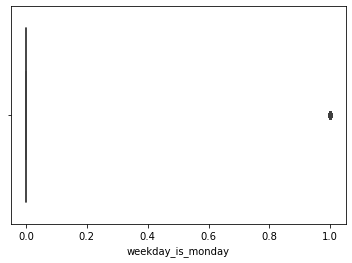

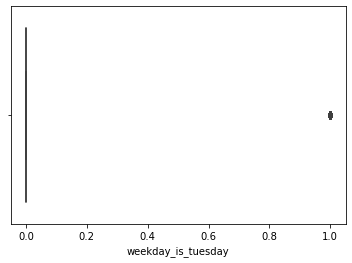

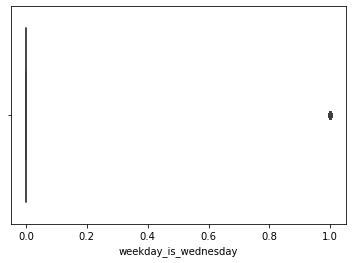

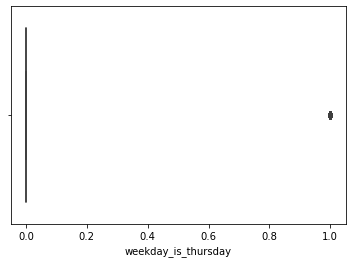

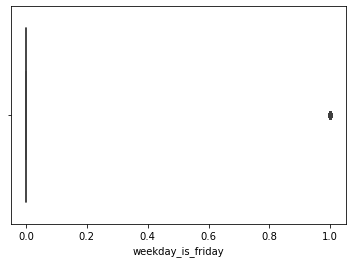

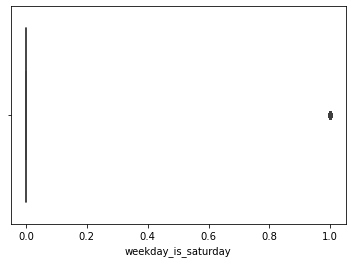

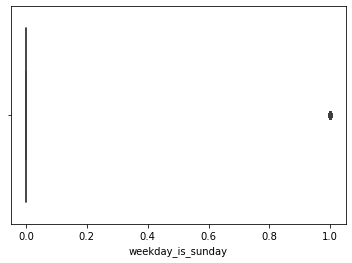

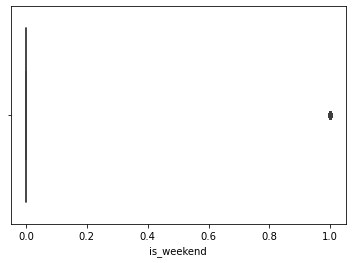

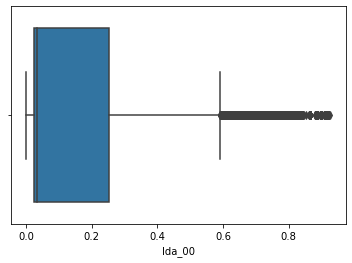

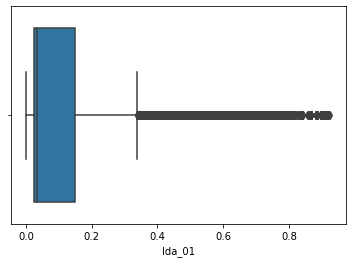

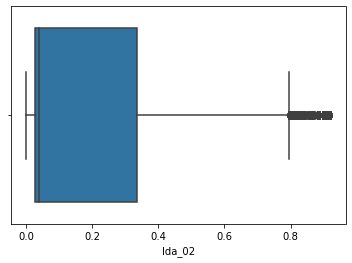

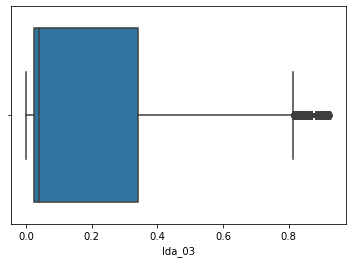

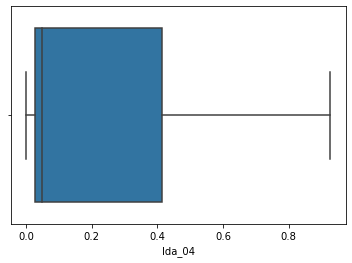

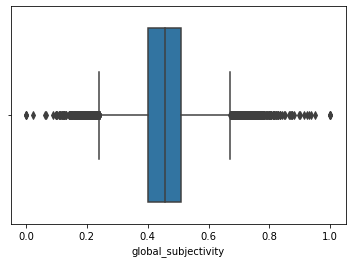

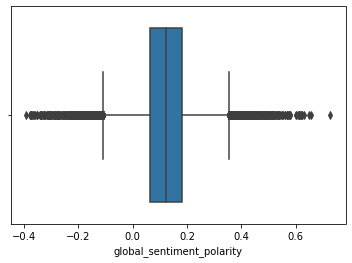

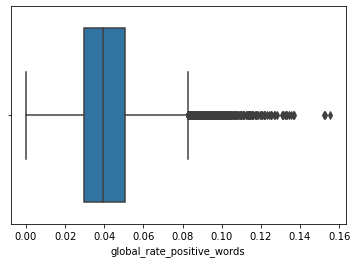

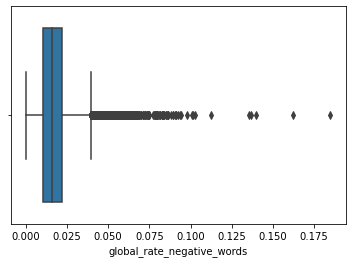

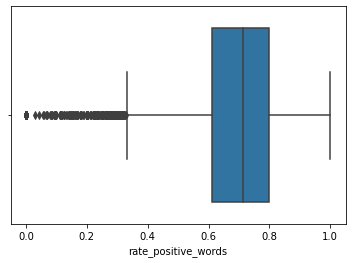

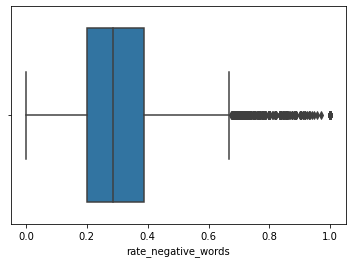

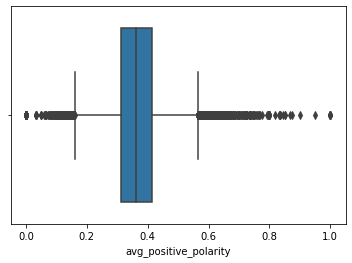

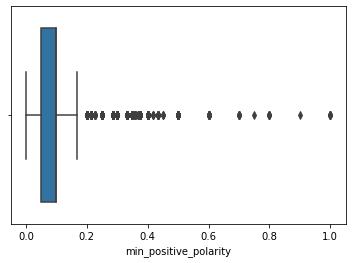

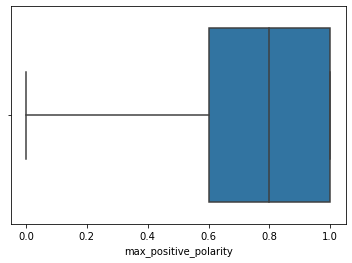

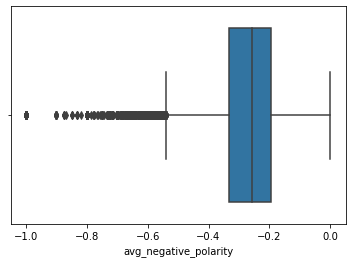

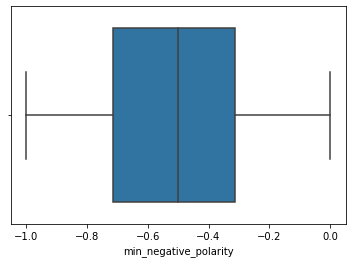

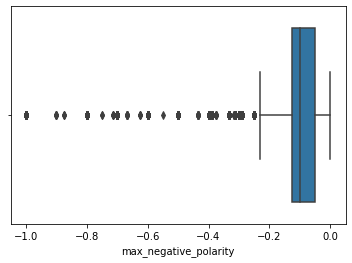

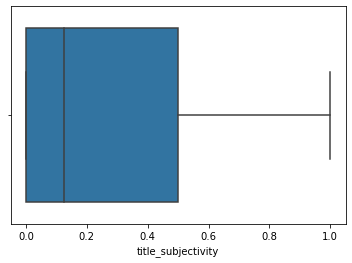

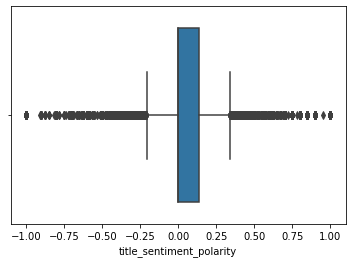

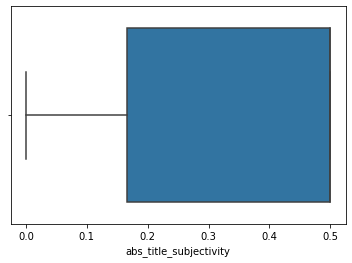

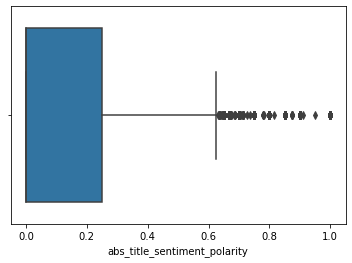

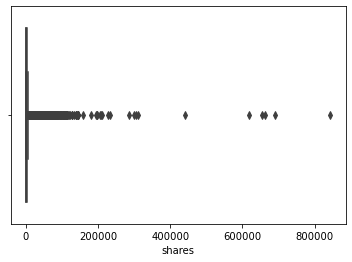

In [26]:
num_cols = df.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(x=df[num_cols[i]])
    plt.show()

In [27]:
for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

In [28]:
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [29]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

df2_num = df2_num.drop('shares',axis=1)

In [30]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'lda_00', 'lda_01', 'lda_02', 'lda_03',
       'lda_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [31]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [32]:
# We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

In [33]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [34]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'lda_00', 'lda_01', 'lda_02', 'lda_03',
       'lda_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'k

In [35]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [36]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [37]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [38]:
#Treating outlier :  

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [39]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
3.0351766196848686
9.255141622951946
1.5549912508167694
Number of outliers in "n_tokens_content" : 0
3.8606109358471805
7.438987854892925
0.8945942297614362
Number of outliers in "n_unique_tokens" : 521
-1.1447330856397202
-0.1145799574171531
0.2575382820556418
Number of outliers in "average_token_length" : 0
0.7213218976211406
0.7805063649014632
0.01479611682008064
Number of outliers in "num_keywords" : 0
0.08898030896099218
14.927545776135672
3.7096413667936696
Number of outliers in "num_hrefs_new" : 0
0.549171638846343
3.43450060777549
0.7213322422322868
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914342191073
2.872819482290186
0.8756277291273233
Number of outliers in "num_imgs_new" : 0
-0.16197366610802344
1.8075267721179116
0.4923751095564838
Number of outliers in "num_videos_new" : 0
-0.6194220377541412
1.0323700629235686
0.41294802516942747
Number of outliers in "kw_min_min_new" : 0
-1.7368309261901067
2.8947182103168445
1.157

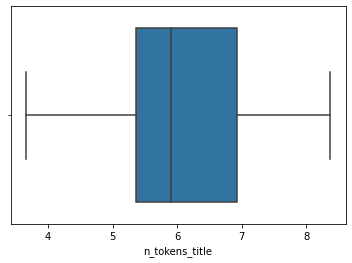

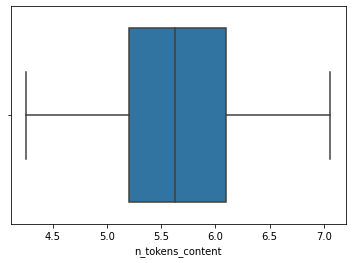

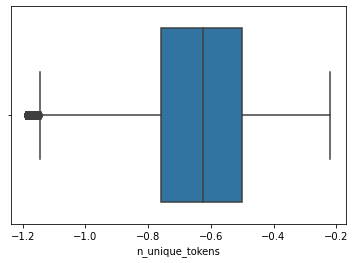

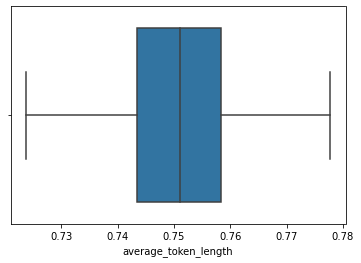

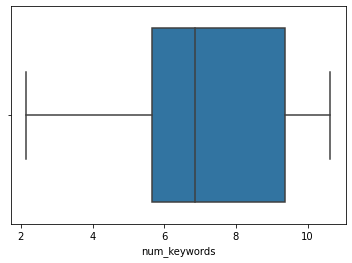

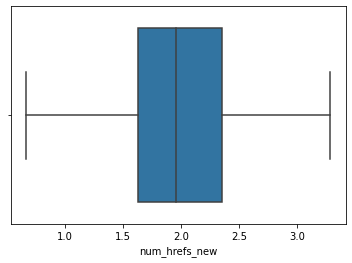

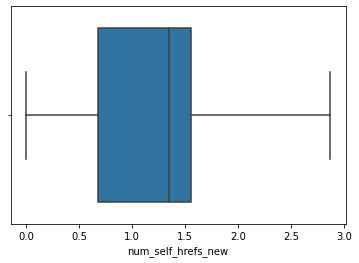

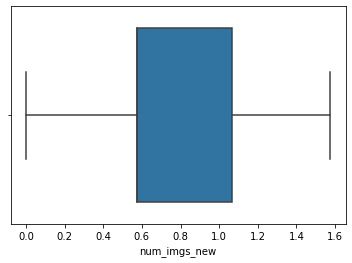

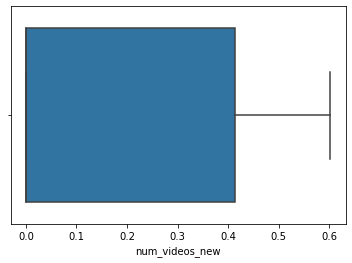

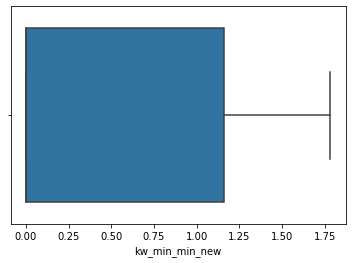

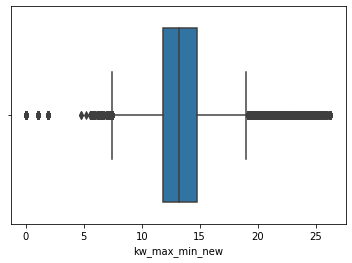

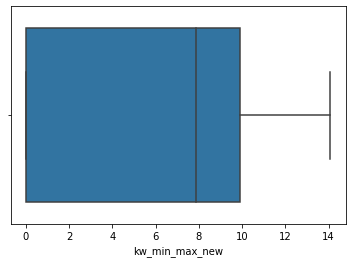

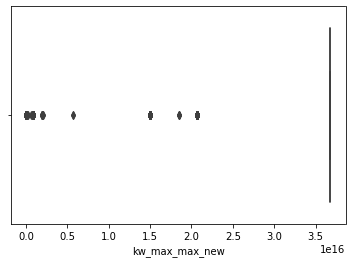

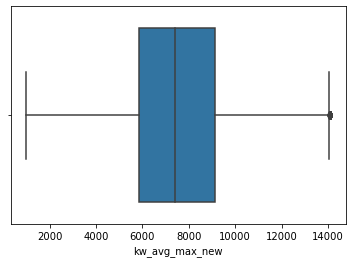

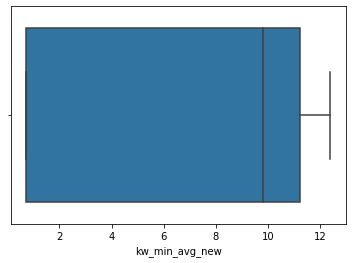

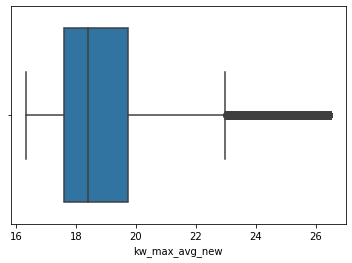

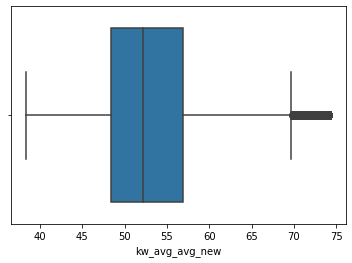

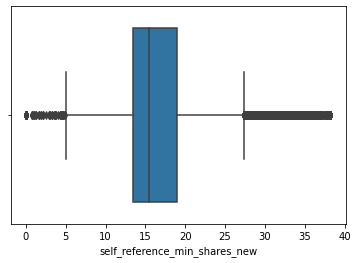

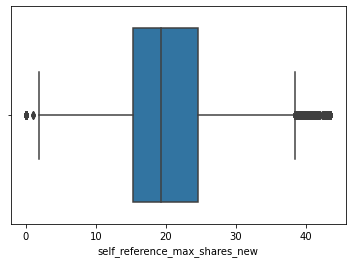

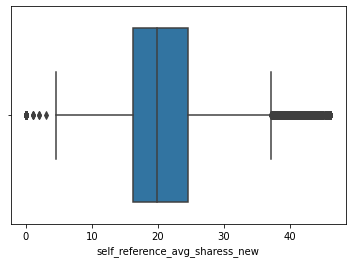

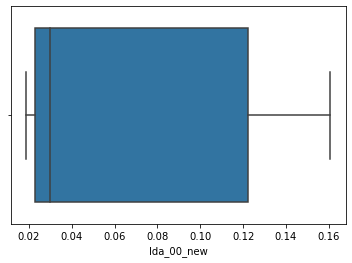

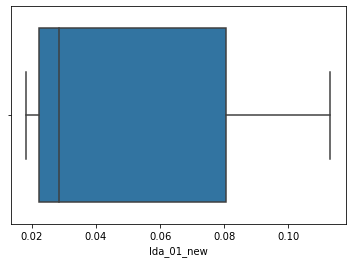

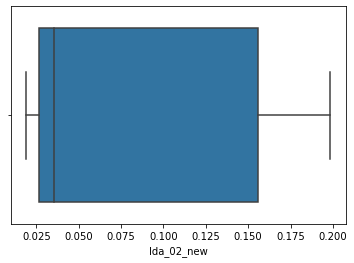

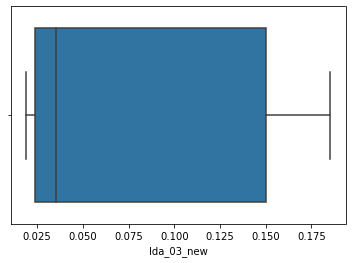

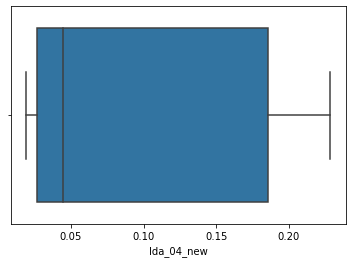

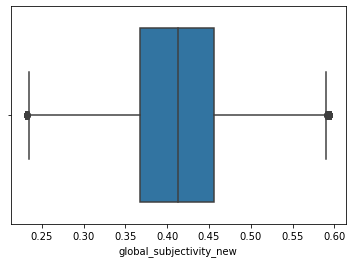

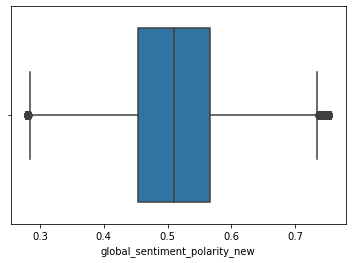

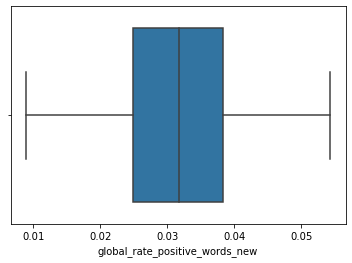

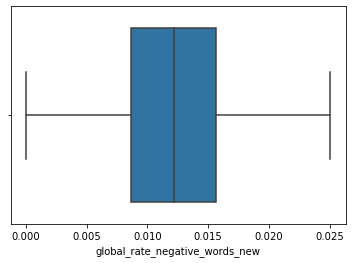

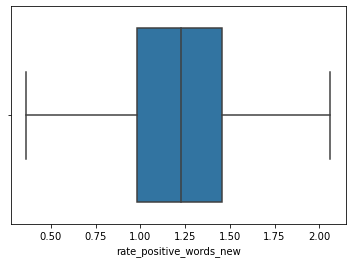

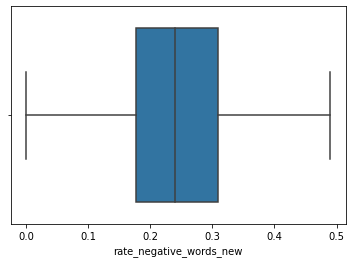

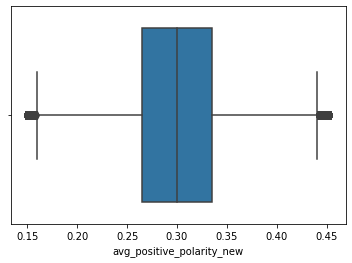

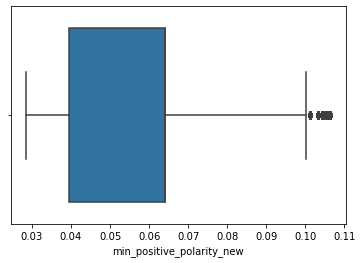

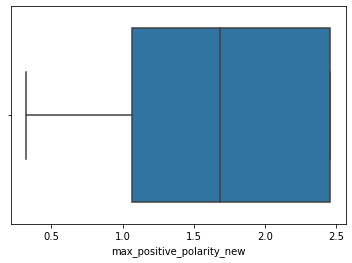

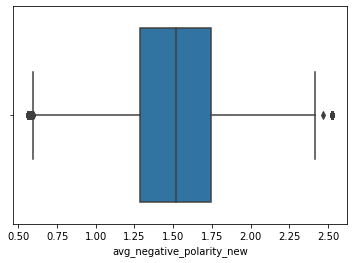

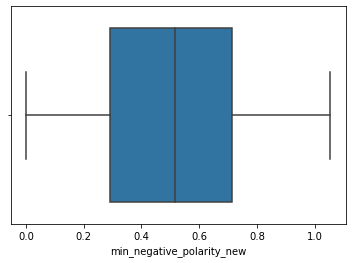

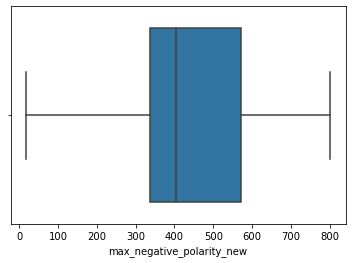

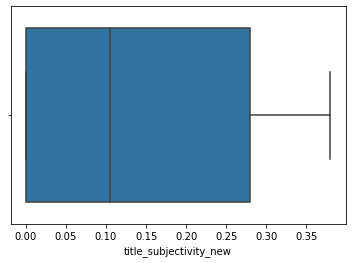

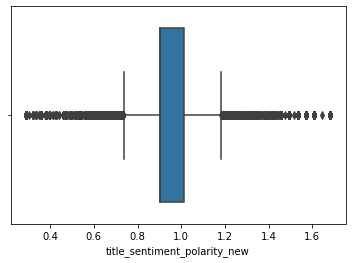

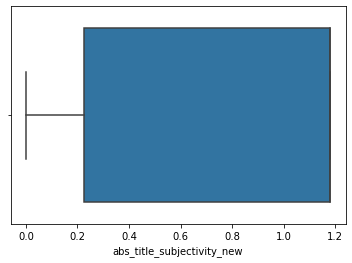

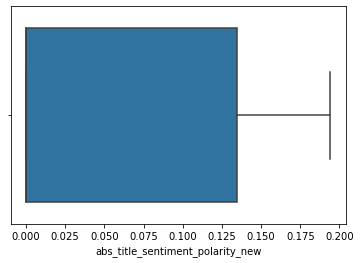

In [41]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(x=df2_num_add[num_cols[i]])
    plt.show()

In [42]:
df2_num_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'lda_00_new', 'lda_01_new',
       'lda_02_new', 'lda_03_new', 'lda_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [43]:
df2_cat.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [44]:
# Combining numeric features and catogorical features.

df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [45]:
df_final.shape

(39518, 55)

In [46]:
df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [47]:
df_final.isnull().sum()

n_tokens_title                      1055
n_tokens_content                    1055
n_unique_tokens                     1055
average_token_length                1055
num_keywords                        1055
num_hrefs_new                       1055
num_self_hrefs_new                  1055
num_imgs_new                        1055
num_videos_new                      1055
kw_min_min_new                      1055
kw_max_min_new                      1055
kw_min_max_new                      1055
kw_max_max_new                      1055
kw_avg_max_new                      1055
kw_min_avg_new                      1055
kw_max_avg_new                      1055
kw_avg_avg_new                      1055
self_reference_min_shares_new       1055
self_reference_max_shares_new       1055
self_reference_avg_sharess_new      1055
lda_00_new                          1055
lda_01_new                          1055
lda_02_new                          1055
lda_03_new                          1055
lda_04_new      

In [48]:
df_final=df_final.dropna()

In [49]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'lda_00_new', 'lda_01_new',
       'lda_02_new', 'lda_03_new', 'lda_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [50]:
df_final.shape

(37408, 56)

In [52]:
X=df_final.drop(['popularity'],axis=1)
y=df_final['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [55]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [56]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
# Making predictions
predictions = rfc.predict(X_test)

In [58]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [15]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [59]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[1831 1658]
 [1255 2738]]


In [60]:
print(accuracy_score(y_test,predictions))

0.6106655974338412


## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,8,1],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,1000, 150], 
    'max_features': [5, 10, 1]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [64]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': [5, 10, 1],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, verbose=1)

In [65]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6263786236508138 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


In [66]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=100)

In [67]:
# fit
rfc.fit(X_train,y_train)

# predict
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.63      0.45      0.52      3489
         1.0       0.61      0.77      0.68      3993

    accuracy                           0.62      7482
   macro avg       0.62      0.61      0.60      7482
weighted avg       0.62      0.62      0.61      7482

[[1575 1914]
 [ 937 3056]]
